In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import graphviz

![title](http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png)

In [2]:
iris_file = "iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(iris_file, names=names)

In [3]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
np.unique(dataset.iloc[:, -1].values)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0, 0.5, 'sepal-width')

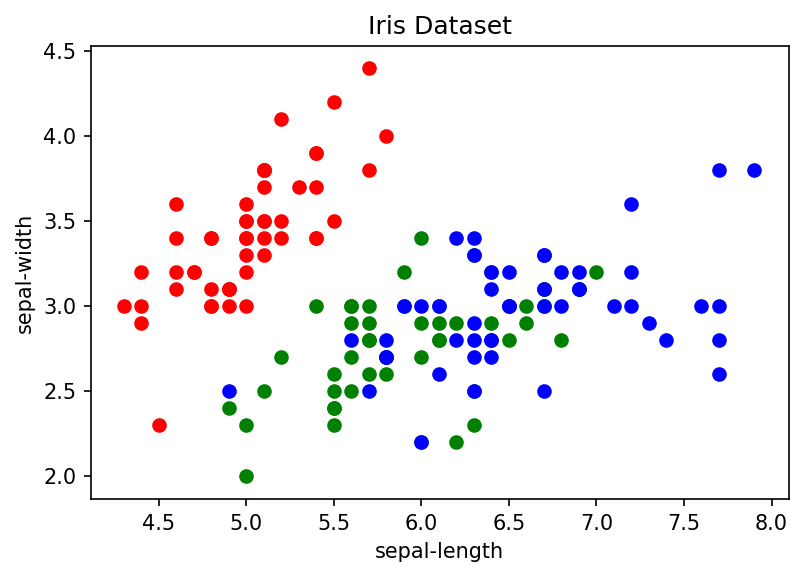

In [27]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(dataset['sepal-length'])):
    ax.scatter(dataset['sepal-length'][i], dataset['sepal-width'][i],color=colors[dataset['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal-length')
ax.set_ylabel('sepal-width')

In [4]:
# Simple DT machine learning model

In [5]:
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

In [6]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

## Split your data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

## Simple machine learning model

In [14]:
clf = tree.DecisionTreeClassifier()

In [15]:
clf = clf.fit(X_train, y_train)

### Train fit

In [16]:
pred = clf.predict(X.iloc[0:1, 0:])
print(pred)
print([y[0]])

['Iris-setosa']
['Iris-setosa']


In [17]:
# test on unseen data
metrics.accuracy_score(clf.predict(X_test.iloc[0:, 0:]), y_test)

0.96

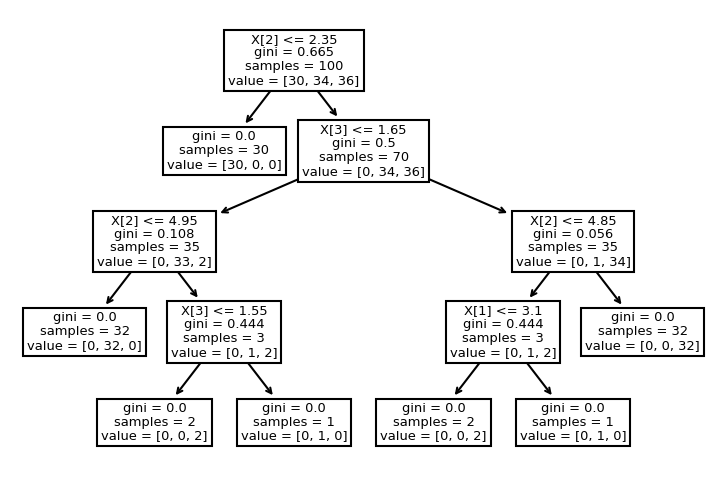

In [18]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
tree.plot_tree(clf.fit(X_train, y_train))
plt.show()

In [19]:
## export the tree in Graphviz format using the export_graphviz (optional)
## graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output file iris.pdf
dot_data = tree.export_graphviz(clf, out_file=None) 


In [20]:
graph = graphviz.Source(dot_data) 


In [21]:
os.listdir()

['.ipynb_checkpoints',
 'iris',
 'iris.csv',
 'Iris.ipynb',
 'iris.names.md',
 'LICENSE',
 'PyBrad.ppt',
 'PyBradford.pptx',
 'Python Cheat Sheet.pdf',
 'python-basic-1-v2.ipynb',
 'python-basic-1.ipynb',
 'README.md',
 'requirements.txt']

In [22]:
graph.render("iris")

'iris.pdf'

In [23]:
list(X.columns)

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

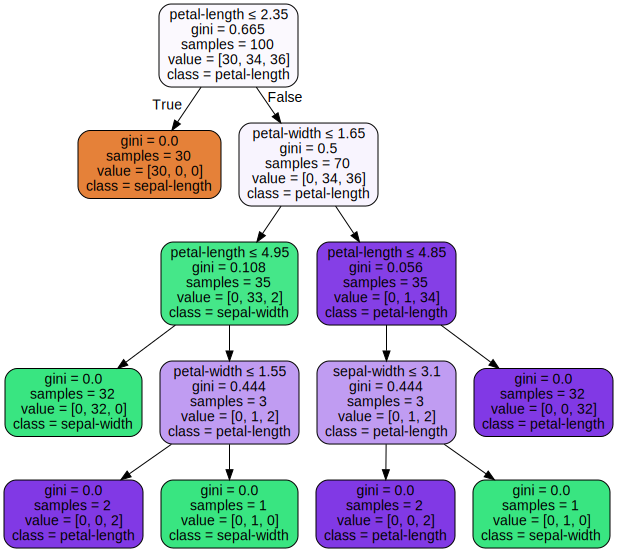

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=list(X.columns),  
                      class_names=names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
